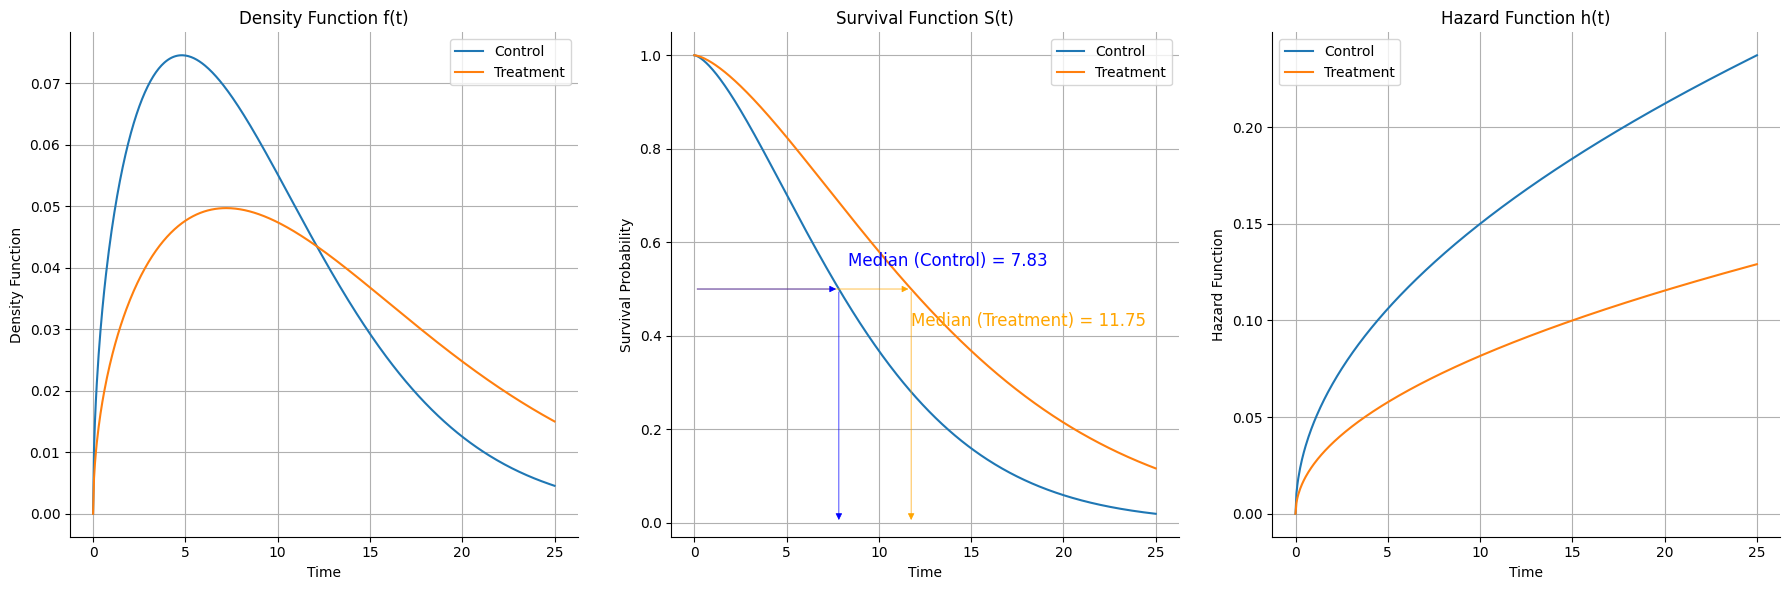

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Weibull parameters for the two arms
c1, scale1 = 1.5, 10  # Control arm
c2, scale2 = 1.5, 15  # Treatment arm

# Define time range
t = np.linspace(0, 25, 500)

# Survival functions
S1 = weibull_min.sf(t, c1, scale=scale1)
S2 = weibull_min.sf(t, c2, scale=scale2)

# Hazard functions
h1 = weibull_min.pdf(t, c1, scale=scale1) / weibull_min.sf(t, c1, scale=scale1)
h2 = weibull_min.pdf(t, c2, scale=scale2) / weibull_min.sf(t, c2, scale=scale2)

# Density functions
f1 = weibull_min.pdf(t, c1, scale=scale1)
f2 = weibull_min.pdf(t, c2, scale=scale2)

# Median survival times
median1 = scale1 * (np.log(2))**(1/c1)
median2 = scale2 * (np.log(2))**(1/c2)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Density function
axes[0].plot(t, f1, label='Control')
axes[0].plot(t, f2, label='Treatment')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Density Function')
axes[0].set_title('Density Function f(t)')
axes[0].legend()
axes[0].grid(True)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot Survival function
axes[1].plot(t, S1, label='Control')
axes[1].plot(t, S2, label='Treatment')
# axes[1].axhline(0.5, color='gray', linestyle='--')
# axes[1].axvline(median1, color='blue', linestyle='--')
# axes[1].axvline(median2, color='orange', linestyle='--')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Survival Probability')
axes[1].set_title('Survival Function S(t)')
axes[1].legend()
axes[1].grid(True)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Plot Hazard function
axes[2].plot(t, h1, label='Control')
axes[2].plot(t, h2, label='Treatment')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Hazard Function')
axes[2].set_title('Hazard Function h(t)')
axes[2].legend()
axes[2].grid(True)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Highlight median survival times
for ax in axes:
    ax.annotate('', xy=(median2, 0.5), xytext=(0, 0.5),
                arrowprops=dict(arrowstyle='-|>', color='orange', lw=.5))
    ax.annotate('', xy=(median2, 0.5), xytext=(median2, 0),
                arrowprops=dict(arrowstyle='<|-', color='orange', lw=.5))
    ax.annotate('', xy=(median1, 0.5), xytext=(0, 0.5),
                arrowprops=dict(arrowstyle='-|>', color='blue', lw=.5))
    ax.annotate('', xy=(median1, 0.5), xytext=(median1, 0),
                arrowprops=dict(arrowstyle='<|-', color='blue', lw=.5))
    ax.annotate(f'Median (Control) = {median1:.2f}', xy=(median1, 0.5), xytext=(median1 + .5, 0.55),
                fontsize=12, color='blue')
    ax.annotate(f'Median (Treatment) = {median2:.2f}', xy=(median2, 0.5), xytext=(median2 + 0, 0.42),
                fontsize=12, color='orange')

plt.tight_layout()
plt.show()

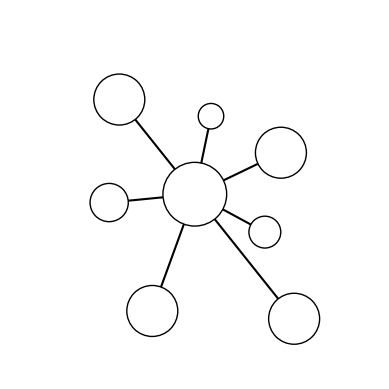

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw a hub and spoke diagram with specified node sizes and lengths
def draw_hub_and_spoke(hub_size, spoke_specs, filename):
    # Define the hub position
    hub = np.array([0, 0])
    
    # Create the figure and axis
    fig, ax = plt.subplots()
    
    # Draw the hub
    hub_circle = plt.Circle(hub, hub_size, color='white', ec='black', zorder=2)
    ax.add_patch(hub_circle)
    
    # Draw the spokes
    for angle, (length, size) in spoke_specs:
        # Calculate spoke position based on angle and length
        spoke = np.array([length * np.cos(angle), length * np.sin(angle)])
        
        # Draw line from hub to spoke
        ax.plot([hub[0], spoke[0]], [hub[1], spoke[1]], 'k-', zorder=1)
        
        # Draw spoke node
        spoke_circle = plt.Circle(spoke, size, color='white', ec='black', zorder=2)
        ax.add_patch(spoke_circle)
    
    # Set aspect of the plot to be equal
    ax.set_aspect('equal')
    
    # Hide axes
    ax.axis('off')
    
    # Set limits to make sure everything fits in the plot
    max_extent = max(length for angle, (length, size) in spoke_specs) + max(size for angle, (length, size) in spoke_specs)
    ax.set_xlim([-max_extent, max_extent])
    ax.set_ylim([-max_extent, max_extent])
    
    # Save the plot to a file
    plt.savefig(filename, bbox_inches='tight')
    
    # Show the plot
    plt.show()

hub_size = 1

# Specify the angles (in radians), lengths, and sizes for each spoke in clockwise order
spoke_specs = [
    (np.pi / 2.3, (2.5, 0.4)), # first     
    (np.pi / 7, (3, 0.8)), # 2nd           
    (7 * np.pi / 3.8, (2.5, 0.5)), # 3rd
    (3 * np.pi / 1.75, (5, 0.8)),   # 4th 
    (5 * np.pi / 3.6, (3.9, 0.8)), # 3rd  
    (np.pi/ .97, (2.7, 0.6)),        # 2nd  
    (3 * np.pi / 4.2, (3.8, 0.8)) # last  
]

# Specify the filename to save the plot
filename = "hub_and_spoke.png"

# Call the function to draw the hub and spoke diagram and save it to a file
draw_hub_and_spoke(hub_size, spoke_specs, filename)


In [3]:
import numpy as np

print(np.pi)


3.141592653589793


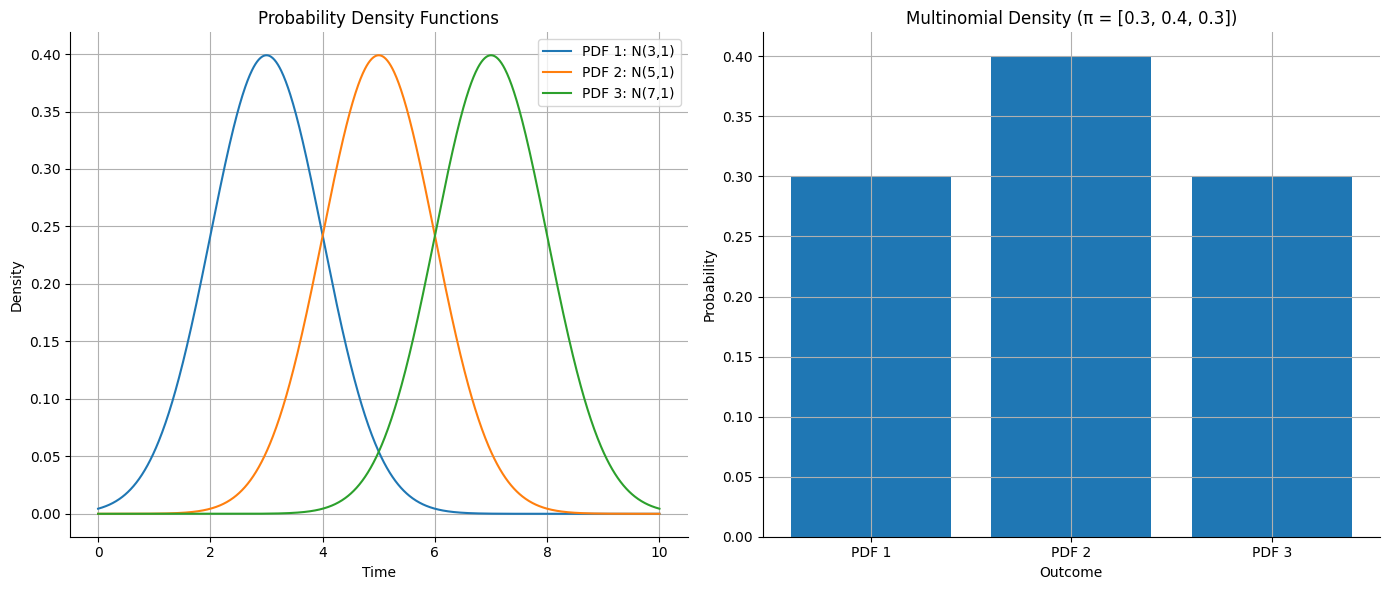

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multinomial

# Time points
t = np.linspace(0, 10, 1000)

# PDFs: Normal distributions
f1 = norm.pdf(t, loc=3, scale=1)
f2 = norm.pdf(t, loc=5, scale=1)
f3 = norm.pdf(t, loc=7, scale=1)

# Multinomial density
pi = [0.3, 0.4, 0.3]
multi_density = multinomial.pmf([1, 0, 0], n=1, p=pi)

# Plotting the PDFs and Multinomial density
plt.figure(figsize=(14, 6))

# PDFs
plt.subplot(1, 2, 1)
plt.plot(t, f1, label='PDF 1: N(3,1)')
plt.plot(t, f2, label='PDF 2: N(5,1)')
plt.plot(t, f3, label='PDF 3: N(7,1)')
plt.title('Probability Density Functions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Multinomial density
plt.subplot(1, 2, 2)
plt.bar(['PDF 1', 'PDF 2', 'PDF 3'], pi)
plt.title('Multinomial Density (π = [0.3, 0.4, 0.3])')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


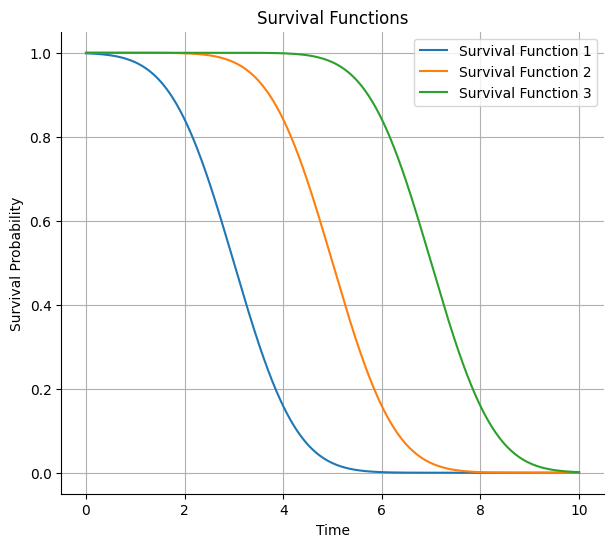

In [6]:
# Survival functions
S1 = 1 - norm.cdf(t, loc=3, scale=1)
S2 = 1 - norm.cdf(t, loc=5, scale=1)
S3 = 1 - norm.cdf(t, loc=7, scale=1)

# Plotting the survival functions
plt.figure(figsize=(7, 6))
plt.plot(t, S1, label='Survival Function 1')
plt.plot(t, S2, label='Survival Function 2')
plt.plot(t, S3, label='Survival Function 3')
plt.title('Survival Functions')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


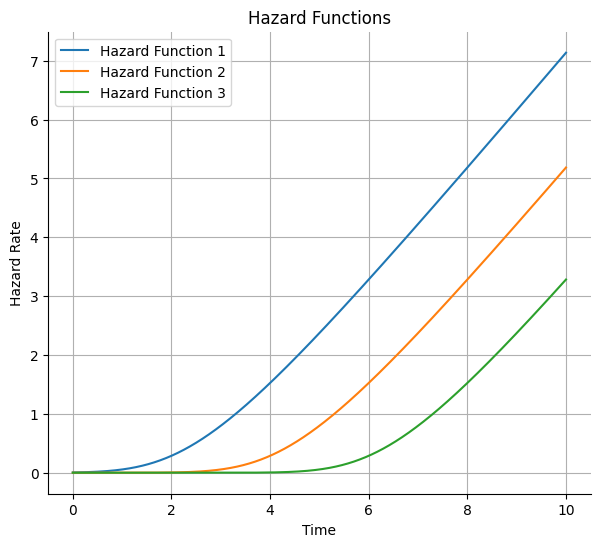

In [7]:
# Hazard functions
h1 = f1 / S1
h2 = f2 / S2
h3 = f3 / S3

# Plotting the hazard functions
plt.figure(figsize=(7, 6))
plt.plot(t, h1, label='Hazard Function 1')
plt.plot(t, h2, label='Hazard Function 2')
plt.plot(t, h3, label='Hazard Function 3')
plt.title('Hazard Functions')
plt.xlabel('Time')
plt.ylabel('Hazard Rate')
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [8]:
# Simulate data
np.random.seed(0)
X = np.random.rand(100, 3)
Y = np.random.rand(100, 1)

# Compute beta coefficient vector
beta = np.linalg.inv(X.T @ X) @ X.T @ Y

beta


array([[0.17319547],
       [0.4104582 ],
       [0.25805577]])

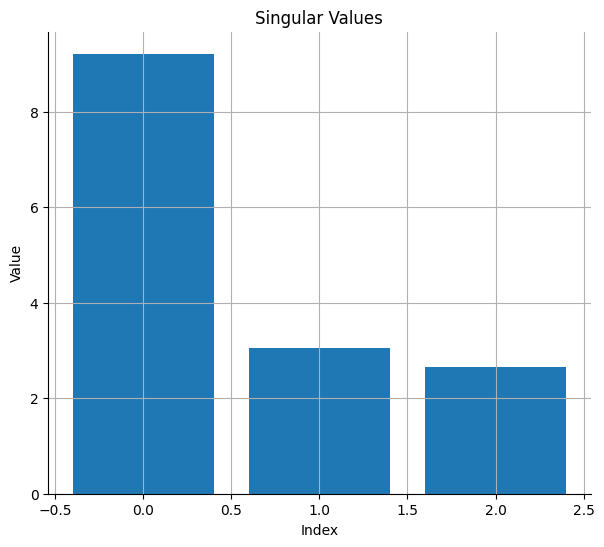

In [9]:
# SVD
U, Sigma, Vt = np.linalg.svd(X)

# Visualize singular values
plt.figure(figsize=(7, 6))
plt.bar(range(len(Sigma)), Sigma)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


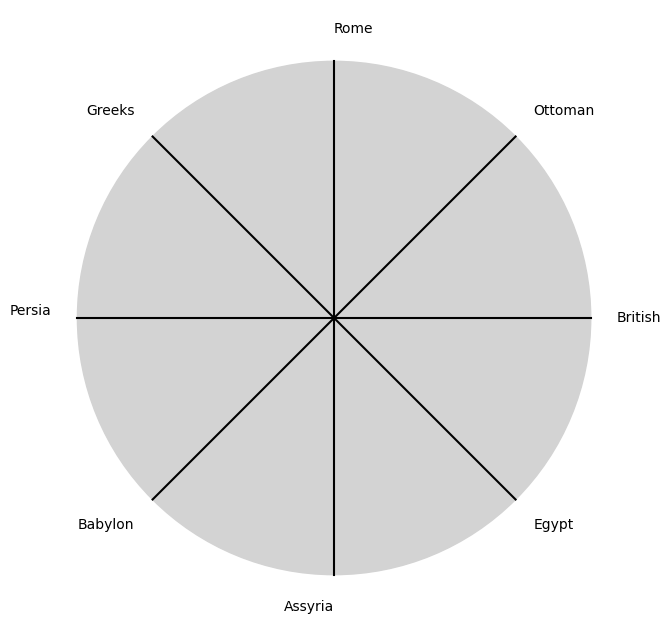

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Clock settings
clock_face_radius = 1.0
number_of_ticks = 8
tick_labels = [
    "Egypt", "Assyria", "Babylon", "Persia",
    "Greeks", "Rome", "Ottoman", "British"
]

# Calculate the angles for each tick (in radians)
angles = np.linspace(0, 2 * np.pi, number_of_ticks, endpoint=False)
# Inverting the order to make it counterclockwise
angles = angles[::-1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')

# Draw the clock face
clock_face = plt.Circle((0, 0), clock_face_radius, color='lightgrey', fill=True)
ax.add_patch(clock_face)

# Draw the ticks and labels
for angle, label in zip(angles, tick_labels):
    x = clock_face_radius * np.cos(angle)
    y = clock_face_radius * np.sin(angle)
    
    # Draw the tick
    ax.plot([0, x], [0, y], color='black')
    
    # Positioning the labels slightly outside the clock face
    label_x = 1.1 * clock_face_radius * np.cos(angle)
    label_y = 1.1 * clock_face_radius * np.sin(angle)
    
    # Adjusting label alignment based on its position
    ha = 'center'
    va = 'center'
    if np.cos(angle) > 0:
        ha = 'left'
    elif np.cos(angle) < 0:
        ha = 'right'
    if np.sin(angle) > 0:
        va = 'bottom'
    elif np.sin(angle) < 0:
        va = 'top'
    
    ax.text(label_x, label_y, label, horizontalalignment=ha, verticalalignment=va, fontsize=10)

# Remove axes
ax.axis('off')

# Show the plot
plt.show()


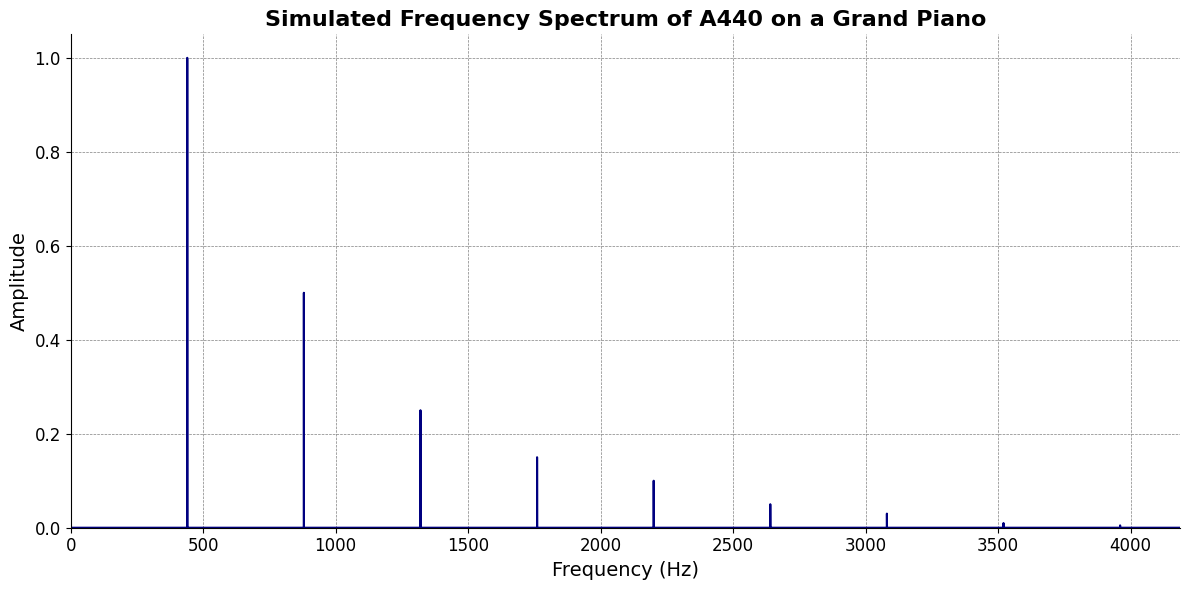

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sample_rate = 44100  # Hz
duration = 20.0       # seconds
A4_freq = 440.0      # Hz

# Time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Fundamental frequency (A4)
signal = np.sin(2 * np.pi * A4_freq * t)

# Adding overtones (harmonics)
harmonics = [2, 3, 4, 5, 6, 7, 8, 9]  # First few harmonics
amplitudes = [0.5, 0.25, 0.15, 0.1, 0.05, 0.03, 0.01, 0.005]  # Amplitudes for each harmonic

for i, harmonic in enumerate(harmonics):
    signal += amplitudes[i] * np.sin(2 * np.pi * A4_freq * harmonic * t)

# Perform FFT (Fast Fourier Transform)
N = len(signal)
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, 1 / sample_rate)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]), color='navy', lw=1.5)

# Aesthetics improvements
plt.title('Simulated Frequency Spectrum of A440 on a Grand Piano', fontsize=16, weight='bold')
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.xlim(0, 4186)  # Limit to the highest frequency on a piano (C8)
plt.ylim(0, None)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Light grid
plt.grid(color='grey', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()
